In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [19]:
def ShowImage(name, image):
    plt.figure(figsize=(10,5))
    plt.title(str(name))
    plt.imshow(image)
    plt.show() 
    # cv2.waitKey(0)  # 等待时间，0表示任意键退出
    # cv2.destroyAllWindows()

In [32]:
image = cv2.imread('image/50325hph.jpg', 0)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
template = cv2.imread('image/scalebar1.jpg', 0)
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# 获取照片的高宽
h, w = template.shape[:2]

res = cv2.matchTemplate(image, template, method)
输入参数method，指的是对应的匹配方法。一共有一下6种（经过归一化后的方法，匹配结果好一些）：

TM_SQDIFF，计算平方不同，计算结果越小越好。

TM_CCORR，计算相关性，计算结果越大越好。

TM_CCOEFF，计算相关系数，计算结果越大越好。

TM_SQDIFF_NORMED，计算归一化平方，计算结果越接近0越好。

TM_CCORR_NORMED，计算归一化相关性，计算结果越接近1越好。

TM_CCOEFF_NORMED，计算归一化相关系数，计算结果越接近1越好。

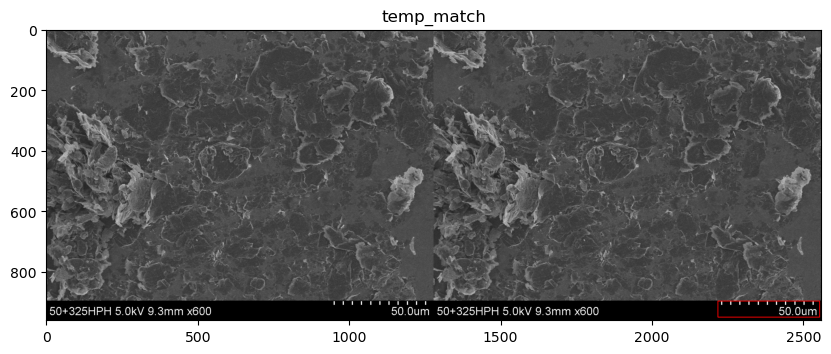

In [33]:
# ShowImage('image', image)
# ShowImage('template', template)
# print(image.shape)
# print(template.shape)

temp = image.copy()
res = cv2.matchTemplate(image, template, cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = min_loc
bottom_right = (top_left[0]+w, top_left[1]+h)
cv2.rectangle(temp, top_left, bottom_right, 255, 2)

result = np.hstack((image, temp))
ShowImage('temp_match', result)